### Biblioteki

In [44]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

### Wczytanie danych do analizy

In [45]:
# Wczytanie pliku JSON z danych treningowych
with open('data/PPEs.v6i.coco/train/_annotations.coco.json', 'r') as f:
    data_train = json.load(f)

# Wczytanie pliku JSON z danych testowych
with open('data/PPEs.v6i.coco/test/_annotations.coco.json', 'r') as f:
    data_test = json.load(f)

# Wczytanie pliku JSON z danych walidacyjnych
with open('data/PPEs.v6i.coco/valid/_annotations.coco.json', 'r') as f:
    data_valid = json.load(f)

### Analiza

In [46]:
# Wybranie danych treningowych do analizy
images_train = data_train['images']
annotations_train = data_train['annotations']
categories_train = data_train['categories']

# Wybranie danych testowych do analizy
images_test = data_test['images']
annotations_test = data_test['annotations']
categories_test = data_test['categories']

# Wybranie danych walidacyjnych do analizy
images_valid = data_valid['images']
annotations_valid = data_valid['annotations']
categories_valid = data_valid['categories']

### Balans klas

In [47]:
# Balans klas danych treningowych
class_train_counts = {}
for annotation_train in annotations_train:
    category_train_id = annotation_train['category_id']
    class_train_counts[category_train_id] = class_train_counts.get(category_train_id, 0) + 1

# Balans klas danych testowych
class_test_counts = {}
for annotation_test in annotations_test:
    category_test_id = annotation_test['category_id']
    class_test_counts[category_test_id] = class_test_counts.get(category_test_id, 0) + 1

# Balans klas danych walidacyjnych
class_valid_counts = {}
for annotation_valid in annotations_valid:
    category_valid_id = annotation_valid['category_id']
    class_valid_counts[category_valid_id] = class_valid_counts.get(category_valid_id, 0) + 1

In [48]:
# Rozmiar zdjęć danych treningowych
image_train_sizes = [(image_train['width'], image_train['height']) for image_train in images_train]

# Rozmiar zdjęć danych testowych
image_test_sizes = [(image_test['width'], image_test['height']) for image_test in images_test]

# Rozmiar zdjęć danych walidacyjnych
image_valid_sizes = [(image_valid['width'], image_valid['height']) for image_valid in images_valid]

In [49]:
# Ilość zaznaczeń na zdjęciach danych treningowych
annotation_train_counts = {}
for image_train in images_train:
    image_train_id = image_train['id']
    annotation_train_counts[image_train_id] = len([ann_train for ann_train in annotations_train if ann_train['image_id'] == image_train_id])

# Ilość zaznaczeń na zdjęciach danych treningowych
annotation_test_counts = {}
for image_test in images_test:
    image_test_id = image_test['id']
    annotation_test_counts[image_test_id] = len([ann_test for ann_test in annotations_test if ann_test['image_id'] == image_test_id])

# Ilość zaznaczeń na zdjęciach danych treningowych
annotation_valid_counts = {}
for image_valid in images_valid:
    image_valid_id = image_valid['id']
    annotation_valid_counts[image_valid_id] = len([ann_valid for ann_valid in annotations_valid if ann_valid['image_id'] == image_valid_id])



### Przygotowanie danych do wizualizacji

In [50]:
# Wykresu rozkładu klas dla danych treningowych
class_train_names = {category_train['id']: category_train['name'] for category_train in categories_train}
class_train_labels = [class_train_names[category_train_id] for category_train_id in class_train_counts.keys()]
class_train_counts_values = list(class_train_counts.values())

# Wykresu rozkładu klas dla danych testowych
class_test_names = {category_test['id']: category_test['name'] for category_test in categories_test}
class_test_labels = [class_test_names[category_test_id] for category_test_id in class_test_counts.keys()]
class_test_counts_values = list(class_test_counts.values())

# Wykresu rozkładu klas dla danych walidacyjnych
class_valid_names = {category_valid['id']: category_valid['name'] for category_valid in categories_valid}
class_valid_labels = [class_valid_names[category_valid_id] for category_valid_id in class_valid_counts.keys()]
class_valid_counts_values = list(class_valid_counts.values())

### Wizualizacja danych

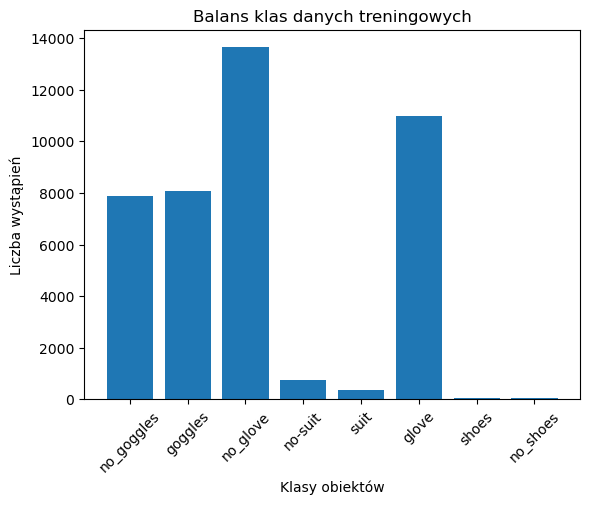

In [51]:
# Wizualizacja dla otrzymanych wyników z danych treningowych
plt.bar(class_train_labels, class_train_counts_values)
plt.xticks(rotation=45)
plt.xlabel('Klasy obiektów')
plt.ylabel('Liczba wystąpień')
plt.title('Balans klas danych treningowych')
plt.show()

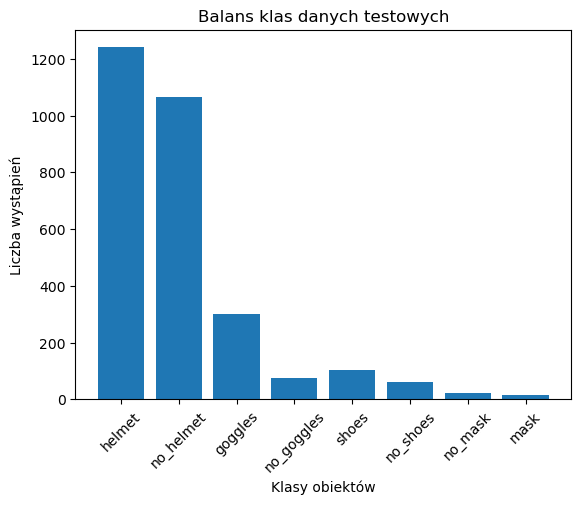

In [52]:
# Wizualizacja dla otrzymanych wyników z danych testowych
plt.bar(class_test_labels, class_test_counts_values)
plt.xticks(rotation=45)
plt.xlabel('Klasy obiektów')
plt.ylabel('Liczba wystąpień')
plt.title('Balans klas danych testowych')
plt.show()

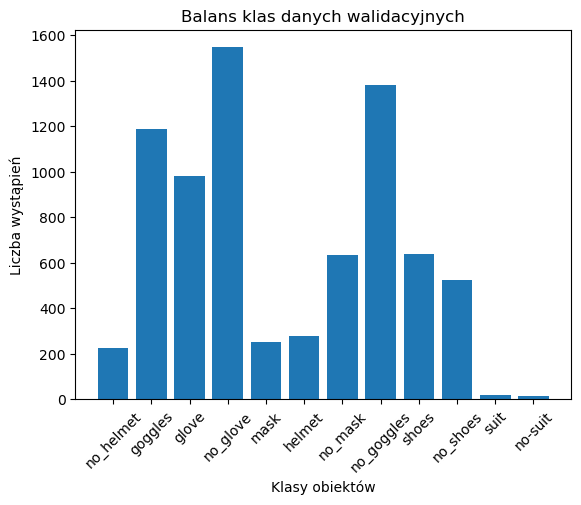

In [53]:
# Wizualizacja dla otrzymanych wyników z danych walidacyjnych
plt.bar(class_valid_labels, class_valid_counts_values)
plt.xticks(rotation=45)
plt.xlabel('Klasy obiektów')
plt.ylabel('Liczba wystąpień')
plt.title('Balans klas danych walidacyjnych')
plt.show()

### Weryfikacja otrzymanych danych (liczbowo)

In [54]:
class_train_labels, class_train_counts_values

(['no_goggles',
  'goggles',
  'no_glove',
  'no-suit',
  'suit',
  'glove',
  'shoes',
  'no_shoes'],
 [7878, 8076, 13644, 744, 363, 10992, 42, 60])

In [55]:
class_test_labels, class_test_counts_values

(['helmet',
  'no_helmet',
  'goggles',
  'no_goggles',
  'shoes',
  'no_shoes',
  'no_mask',
  'mask'],
 [1240, 1067, 300, 77, 102, 61, 21, 16])

In [56]:
class_valid_labels, class_valid_counts_values

(['no_helmet',
  'goggles',
  'glove',
  'no_glove',
  'mask',
  'helmet',
  'no_mask',
  'no_goggles',
  'shoes',
  'no_shoes',
  'suit',
  'no-suit'],
 [228, 1187, 984, 1547, 253, 281, 636, 1384, 639, 525, 18, 15])

### Odpowiedź na pytanie z "Historyjki":
___
Głównym pytaniem było: 
> *Czy zbiór jest wystarczający, aby uruchomić trening?* 

Na podstawie dostarczonych danych można stwierdzić, że zbiór danych **treningowych** zawiera różne klasy obiektów, a liczba wystąpień klas jest nierównomierna. 
Niektóre klasy, takie jak **"no_glove"** i **"no_shoes,"** mają bardzo mało wystąpień, co może stanowić wyzwanie podczas treningu modelu, szczególnie jeśli klasy te są istotne dla aplikacji. Inne klasy, takie jak **"no_goggles"** i **"goggles"** wydają się być bardziej zrównoważone pod względem liczby wystąpień.
W związku z nierównomiernością wystąpień klas **konieczne** może być zrównoważenie zbioru treningowego, zwłaszcza jeśli klasy o mniejszej liczbie wystąpień są istotne w kontekście zastosowania modelu.

___
### Rozszerzono analize o zbiór danych testowych i walidacyjnych, dostarczonych w projekcie.

1. Zbiór testowy:
    - Zawiera 8 klas obiektów. 
    - Podobnie jak w przypadku zbioru treningowego, również w zbiorze testowym występuje nierównomierność wystąpień klas, na przykład, klasa "no_goggles" ma tylko 77 wystąpień. 
    - Przy ocenie modelu na danych testowych, należy wziąć pod uwagę tę nierównomierność i dostosować metryki oceny do kontekstu.
2. Zbiór walidacyjny:
    - Zbiór walidacyjny jest najbardziej zróżnicowany i zawiera 12 klas obiektów. 
    - Nierównomierność wystąpień klas jest nadal widoczna, na przykład, klasy "suit" i "no-suit" mają niską liczbę wystąpień. 
    - Zbiór walidacyjny może być używany do regulacji hiperparametrów modelu oraz do wczesnej oceny jego wydajności.

___
### Proponowane kolejne kroki:

**1. Przeprowadzenie analizy ważności klas**: 
- Nalezy przemyśleć, które klasy są istotne dla naszego zastosowania i jakie jest znaczenie równoważności klas. 
- Jeśli klasy z małą liczbą wystąpień są istotne, nalezy rozwazyc zebranie większej liczby danych dla tych klas.

**2. Przygotowanie zbioru walidacyjnego**: 
- Zbiór walidacyjny jest niezbędny do oceny wydajności modelu podczas treningu.

**3. Przygotowanie zbioru testowego**: 
- Zbiór testowy posłuzy do ostatecznej oceny wydajności modelu po treningu.

**4. Zrównoważenie klas**: 
- Jeśli istnieje potrzeba zrównoważenia liczby wystąpień klas, nalezy rozważyć techniki oversamplingu (dodawanie kopii rzadziej występujących klas) lub undersamplingu (usuwanie często występujących klas).

**5. Trening modelu**: 
- Rozpoczęcie treningu modelu przy użyciu odpowiednich bibliotek i narzędzi, takich jak TensorFlow, PyTorch itp. 
- Monitorowanie postęp treningu i zapewnienie odpowiedniej techniki regularyzacji.

**6. Ocena modelu**: 
- Ocena wydajności modelu na zbiorze walidacyjnym i testowym. 
- Ocena metryki, jak np. dokładność, precyzja, odrzucenie, itp.

**7. Optymalizacja i dostrojenie**: 
- W zależności od wyników oceny, dostosowanie parametrów modelu i treningu oraz rozważenie optymalizacji modelu.

**8. Raportowanie wyników**: 
- Opracowanie raport z wynikami treningu, w tym wynikami oceny modelu na zbiorze testowym. 
- Przedstawienie wniosków.

**9. Doskonalenie modelu**: 
- Jezeli wyniki nie spełniają oczekiwań, zaleca się powtórzyc proces, zebrać więcej danych, dostosować model i wytrenowanie go ponownie, aż do momentu osiągnięcia satysfakcjonujących wyników.
___